In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [5]:
# Load in the DFT features
xyDFT_pkl= open('./data/BH_CR_DFT.pkl', 'rb')
xyDFT= pickle.load(xyDFT_pkl)
ys=xyDFT['yield'].to_numpy()

# Load in indices by compound number
xNum_pkl= open('./data/BH_CR_numbers.pkl', 'rb')
xNum= pickle.load(xNum_pkl).to_numpy()

In [20]:
# Encode compounds as one hot vectors
from sklearn.preprocessing import OneHotEncoder

cats= [[0,1,2], [0,1,2,3], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
xs= OneHotEncoder(categories=cats, sparse=False).fit_transform(xNum)

In [21]:
from sklearn.model_selection import train_test_split

xTr, xTe, yTr, yTe = train_test_split(xs, ys, test_size=0.2, random_state=42)

print(xTr.shape, yTr.shape)
print(xTe.shape, yTe.shape)

(3308, 45) (3308,)
(827, 45) (827,)


In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

### Linear Models

In [23]:
from sklearn.linear_model import LinearRegression

ols= LinearRegression().fit(xTr, yTr)
scaledOLS= make_pipeline(StandardScaler(), LinearRegression()).fit(xTr, yTr)

from sklearn.linear_model import RidgeCV

ridge= RidgeCV(
    alphas= np.logspace(-3,3),
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False)).fit(xTr, yTr)
scaledridge= make_pipeline(StandardScaler(), RidgeCV(
    alphas= np.logspace(-3,3),
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False))).fit(xTr, yTr)

from sklearn.linear_model import LassoCV

lasso= LassoCV(cv= KFold(n_splits=10), max_iter=10000).fit(xTr, yTr)
scaledlasso= make_pipeline(StandardScaler(), LassoCV(cv= KFold(n_splits=10), max_iter=10000)).fit(xTr, yTr)

from sklearn.linear_model import ElasticNetCV

enet= ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv= KFold(n_splits=10), max_iter=10000).fit(xTr, yTr)
scaledenet= make_pipeline(StandardScaler(), ElasticNetCV(
    l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
    cv= KFold(n_splits=10), max_iter=10000)).fit(xTr, yTr)

The model: OLS
Training MSE: 215.40887
Test MSE: 229.53869
Test R2: 0.69548
The model: scaled OLS
Training MSE: 215.50887
Test MSE: 228.81449
Test R2: 0.69644


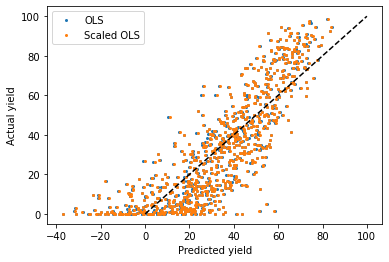

In [24]:
# Evaluate the models
# Evaluate the unscaled ols model
print('The model: OLS')
print("Training MSE: %.5f" % mean_squared_error(yTr, ols.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, ols.predict(xTe)))
print('Test R2: %.5f' % r2_score(yTe, ols.predict(xTe)))

# Evaluate the scaled ols model
print('The model: scaled OLS')
print("Training MSE: %.5f" % mean_squared_error(yTr, scaledOLS.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, scaledOLS.predict(xTe)))
print('Test R2: %.5f' % r2_score(yTe, scaledOLS.predict(xTe)))

# Generate exp-actual plot
plt.plot(ols.predict(xTe), yTe, '.', markersize=4, label='OLS')
plt.plot(scaledOLS.predict(xTe), yTe, '.', markersize=4, label='Scaled OLS')
plt.plot(np.linspace(0,100),np.linspace(0,100), 'k--')
plt.ylabel('Actual yield')
plt.xlabel('Predicted yield')
plt.legend()
plt.show()

The model: Ridge Regression | alpha: 1.151395399326447
Training MSE: 215.42608
Test MSE: 229.39201
Test R2: 0.69567
The model: Scaled Ridge Regression | alpha: 14.563484775012444
Training MSE: 215.41803
Test MSE: 229.44345
Test R2: 0.69560


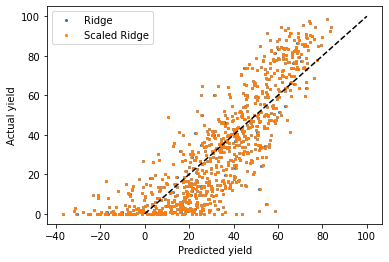

In [25]:
# Evaluate the models
# Evaluate the unscaled ridge regression model
print('The model: Ridge Regression | alpha: %s' % ridge.alpha_)
print("Training MSE: %.5f" % mean_squared_error(yTr, ridge.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, ridge.predict(xTe)))
print('Test R2: %.5f' % r2_score(yTe, ridge.predict(xTe)))

# Evaluate the scaled ridge regression model
print('The model: Scaled Ridge Regression | alpha: %s' % scaledridge[1].alpha_)
print("Training MSE: %.5f" % mean_squared_error(yTr, scaledridge.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, scaledridge.predict(xTe)))
print('Test R2: %.5f' % r2_score(yTe, scaledridge.predict(xTe)))

# Generate exp-actual plot
plt.plot(ridge.predict(xTe), yTe, '.', markersize=4, label='Ridge')
plt.plot(scaledridge.predict(xTe), yTe, '.', markersize=4, label='Scaled Ridge')
plt.plot(np.linspace(0,100),np.linspace(0,100), 'k--')
plt.ylabel('Actual yield')
plt.xlabel('Predicted yield')
plt.legend()
plt.show()

The model: Lasso Regression | alpha: 0.00331
Training MSE: 215.41756
Test MSE: 229.44470
Test R2: 0.69560
The model: Scaled Lasso Regression | alpha: 0.01407
Training MSE: 215.41710
Test MSE: 229.45888
Test R2: 0.69558


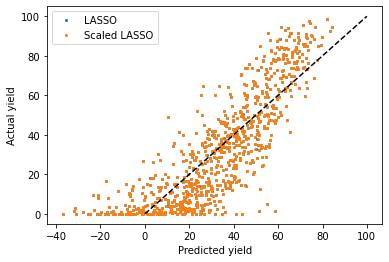

In [26]:

# Evaluate the models
# Evaluate the unscaled lasso regression model
print('The model: Lasso Regression | alpha: %.5f' % lasso.alpha_)
print("Training MSE: %.5f" % mean_squared_error(yTr, lasso.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, lasso.predict(xTe)))
print('Test R2: %.5f' % r2_score(yTe, lasso.predict(xTe)))

# Evaluate the scaled lasso regression model
print('The model: Scaled Lasso Regression | alpha: %.5f' % scaledlasso[1].alpha_)
print("Training MSE: %.5f" % mean_squared_error(yTr, scaledlasso.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, scaledlasso.predict(xTe)))
print('Test R2: %.5f' % r2_score(yTe, scaledlasso.predict(xTe)))

# Generate exp-actual plot
plt.plot(lasso.predict(xTe), yTe, '.', markersize=4, label='LASSO')
plt.plot(scaledlasso.predict(xTe), yTe, '.', markersize=4, label='Scaled LASSO')
plt.plot(np.linspace(0,100),np.linspace(0,100), 'k--')
plt.ylabel('Actual yield')
plt.xlabel('Predicted yield')
plt.legend()
plt.show()

The model: Elastic Net Regression | alpha: 0.00331 | l1 ratio: 1.00000
Training MSE: 215.41756
Test MSE: 229.44470
Test R2: 0.69560
The model: Scaled Elastic Net Regression | alpha: 0.01233 | l1 ratio: 0.70000
Training MSE: 215.42505
Test MSE: 229.39793
Test R2: 0.69566


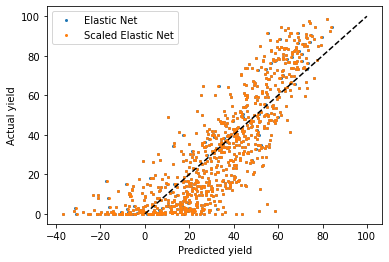

In [27]:
# Evaluate the models
# Evaluate the unscaled elastic net regression model
print('The model: Elastic Net Regression | alpha: %.5f | l1 ratio: %.5f' % (enet.alpha_, enet.l1_ratio_))
print("Training MSE: %.5f" % mean_squared_error(yTr, enet.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, enet.predict(xTe)))
print('Test R2: %.5f' % r2_score(yTe, enet.predict(xTe)))

# Evaluate the scaled elastic net regression model
print('The model: Scaled Elastic Net Regression | alpha: %.5f | l1 ratio: %.5f' % (scaledenet[1].alpha_, scaledenet[1].l1_ratio_))
print("Training MSE: %.5f" % mean_squared_error(yTr, scaledenet.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, scaledenet.predict(xTe)))
print('Test R2: %.5f' % r2_score(yTe, scaledenet.predict(xTe)))

# Generate exp-actual plot
plt.plot(enet.predict(xTe), yTe, '.', markersize=4, label='Elastic Net')
plt.plot(scaledenet.predict(xTe), yTe, '.', markersize=4, label='Scaled Elastic Net')
plt.plot(np.linspace(0,100),np.linspace(0,100), 'k--')
plt.ylabel('Actual yield')
plt.xlabel('Predicted yield')
plt.legend()
plt.show()


In [28]:
from sklearn.linear_model import SGDRegressor

sgdr= GridSearchCV(SGDRegressor(learning_rate='adaptive'),
    param_grid={'alpha': np.logspace(-3,3,num=7), 'penalty': ['l1', 'l2'], 'early_stopping': [True, False]},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1).fit(xTr, yTr)


Fitting 10 folds for each of 28 candidates, totalling 280 fits


In [29]:
scaledSGDR= make_pipeline(StandardScaler(),
    GridSearchCV(SGDRegressor(learning_rate='adaptive'),
    param_grid={'alpha': np.logspace(-3,3, num=7), 'penalty': ['l1','l2'], 'early_stopping': [True, False]},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1)).fit(xTr, yTr)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


The best model: SGDRegressor(alpha=0.001, learning_rate='adaptive')
Training MSE: 215.53744
Test MSE: 229.16567
Test R2: 0.69597
The best model: SGDRegressor(alpha=0.001, early_stopping=True, learning_rate='adaptive',
             penalty='l1')
Training MSE: 215.70670
Test MSE: 230.63714
Test R2: 0.69402


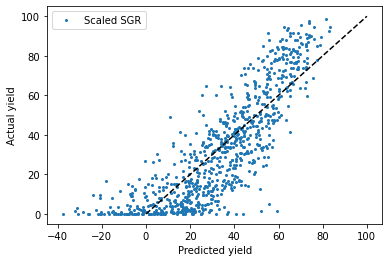

In [30]:
# Evaluate the models
# Evaluate the unscaled model
print('The best model: %s' % sgdr.best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, sgdr.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, sgdr.predict(xTe)))
print('Test R2: %.5f' % r2_score(yTe, sgdr.predict(xTe)))

# Evaluate the scaled model
print('The best model: %s' % scaledSGDR[1].best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, scaledSGDR.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, scaledSGDR.predict(xTe)))
print('Test R2: %.5f' % r2_score(yTe, scaledSGDR.predict(xTe)))

# Generate exp-actual plot
plt.plot(sgdr.predict(xTe), yTe, '.', markersize=4, label='SGR')
plt.plot(scaledSGDR.predict(xTe), yTe, '.', markersize=4, label='Scaled SGR')
plt.plot(np.linspace(0,100),np.linspace(0,100), 'k--')
plt.ylabel('Actual yield')
plt.xlabel('Predicted yield')
plt.legend()
plt.show()

### Generalized Linear Models

In [31]:
from sklearn.linear_model import TweedieRegressor

glm= GridSearchCV(TweedieRegressor(max_iter=1000), 
    param_grid={"power": [0, 1, 1.5, 2, 3]},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1).fit(xTr, yTr)

# Scale the data before fitting the data
scaledGLM= make_pipeline(StandardScaler(),
    GridSearchCV(TweedieRegressor(max_iter=1000),
    param_grid={"power": [0, 1, 1.5, 2, 3], 'alpha': np.linspace(0,1, num=6)},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1)).fit(xTr, yTr)

glmAMZ= make_pipeline(StandardScaler(), TweedieRegressor(power= 0, alpha= 0.1)).fit(xTr, yTr)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


/Users/nml64/.conda/envs/nmlenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nml64/.conda/envs/nmlenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nml64/.conda/envs/nmlenv/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py", line 263, in fit
    raise ValueError(
ValueError: Some value(s) of y are out of the valid range for family TweedieDistribution

  warnings.warn(some_fits_failed_message, Fi

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/Users/nml64/.conda/envs/nmlenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nml64/.conda/envs/nmlenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nml64/.conda/envs/nmlenv/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py", line 263, in fit
    raise ValueError(
ValueError: Some value(s) of y are out of the valid range for family TweedieDistribution

  warnings.warn(some_fits_failed_message,

The best model: TweedieRegressor(max_iter=1000, power=1)
Training MSE: 232.39599
Test MSE: 235.16370
Test R2: 0.68801
The best model: TweedieRegressor(alpha=0.8, max_iter=1000, power=1)
Training MSE: 167.22841
Test MSE: 168.53174
Test RMSE: 12.98198
Test R2: 0.77641
The Zuranski model: TweedieRegressor(alpha=0.1, power=0)
Training MSE: 219.09087
Test MSE: 230.90623
Test RMSE: 15.19560
Test R2: 0.69366


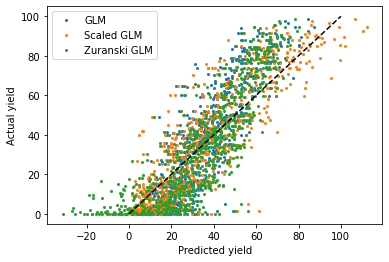

In [32]:
# Evaluate the models
# Evaluate the unscaled model
print('The best model: %s' % glm.best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, glm.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, glm.predict(xTe)))
print('Test R2: %.5f' % r2_score(yTe, glm.predict(xTe)))

# Evaluate the scaled model
print('The best model: %s' % scaledGLM[1].best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, scaledGLM.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, scaledGLM.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, scaledGLM.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, scaledGLM.predict(xTe)))

# Evaluate the Zuranski model
print('The Zuranski model: %s' % glmAMZ[1])
print("Training MSE: %.5f" % mean_squared_error(yTr, glmAMZ.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, glmAMZ.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, glmAMZ.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, glmAMZ.predict(xTe)))

# Generate exp-actual plot
plt.plot(glm.predict(xTe), yTe, '.', markersize=4, label='GLM')
plt.plot(scaledGLM.predict(xTe), yTe, '.', markersize=4, label='Scaled GLM')
plt.plot(glmAMZ.predict(xTe), yTe, '.', markersize=4, label='Zuranski GLM')
plt.plot(np.linspace(0,100),np.linspace(0,100), 'k--')
plt.ylabel('Actual yield')
plt.xlabel('Predicted yield')
plt.legend()
plt.show()

### k-Neighbors Regression

In [33]:
from sklearn.neighbors import KNeighborsRegressor

knr= GridSearchCV(KNeighborsRegressor(weights='distance'), 
    param_grid={"n_neighbors": [1,3,5], "p": [1,2]},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1).fit(xTr, yTr)

# Scale the data before fitting the data
scaledKNR= make_pipeline(StandardScaler(),
    GridSearchCV(KNeighborsRegressor(weights='distance'), 
    param_grid={"n_neighbors": [1,3,5], "p": [1,2]},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1)).fit(xTr, yTr)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits


In [34]:
# Scale the data before fitting the data
scaledKNR2= make_pipeline(StandardScaler(),
    GridSearchCV(KNeighborsRegressor(weights='distance'), 
    param_grid={"n_neighbors": [5, 10, 50, 100], "p": [1,2]},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1)).fit(xTr, yTr)

# Zuranski Model
knrAMZ=make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors= 3)).fit(xTr, yTr)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


The unscaled model: KNeighborsRegressor(p=1, weights='distance')
Training MSE: 0.00000
Test MSE: 324.27069
Test R2: 0.56980
The best model: KNeighborsRegressor(p=1, weights='distance')
Training MSE: 0.00000
Test MSE: 204.01424
Test RMSE: 14.28336
Test R2: 0.72934


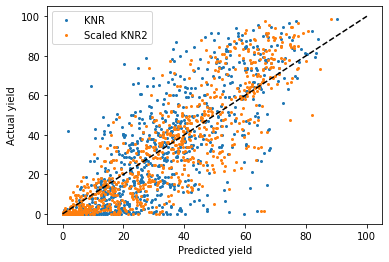

In [35]:
# Evaluate the models
# Evaluate the unscaled model
print('The unscaled model: %s' % knr.best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, knr.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, knr.predict(xTe)))
print('Test R2: %.5f' % r2_score(yTe, knr.predict(xTe)))

print('The best model: %s' % scaledKNR2[1].best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, scaledKNR2.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, scaledKNR2.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, scaledKNR2.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, scaledKNR2.predict(xTe)))

# Generate exp-actual plot
plt.plot(knr.predict(xTe), yTe, '.', markersize=4, label='KNR')
plt.plot(scaledKNR2.predict(xTe), yTe, '.', markersize=4, label='Scaled KNR2')
plt.plot(np.linspace(0,100),np.linspace(0,100), 'k--')
plt.ylabel('Actual yield')
plt.xlabel('Predicted yield')
plt.legend()
plt.show()

The best model: KNeighborsRegressor(p=1, weights='distance')
Training MSE: 0.00000
Test MSE: 204.01424
Test RMSE: 14.28336
Test R2: 0.72934
The Zuranski model: KNeighborsRegressor(n_neighbors=3)
Training MSE: 127.29222
Test MSE: 234.24205
Test RMSE: 15.30497
Test R2: 0.68924


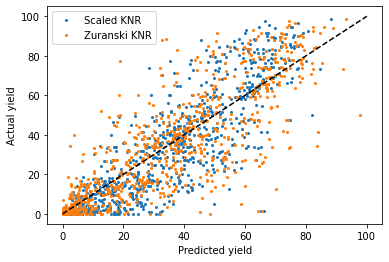

In [36]:
# Evaluate the scaled model
print('The best model: %s' % scaledKNR[1].best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, scaledKNR.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, scaledKNR.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, scaledKNR.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, scaledKNR.predict(xTe)))

# Evaluate the Zuranski model
print('The Zuranski model: %s' % knrAMZ[1])
print("Training MSE: %.5f" % mean_squared_error(yTr, knrAMZ.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, knrAMZ.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, knrAMZ.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, knrAMZ.predict(xTe)))

# Generate exp-actual plot
plt.plot(scaledKNR.predict(xTe), yTe, '.', markersize=4, label='Scaled KNR')
plt.plot(knrAMZ.predict(xTe), yTe, '.', markersize=4, label='Zuranski KNR')
plt.plot(np.linspace(0,100),np.linspace(0,100), 'k--')
plt.ylabel('Actual yield')
plt.xlabel('Predicted yield')
plt.legend()
plt.show()

### Gaussian Process Regression

## Something wrong here

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, DotProduct, ExpSineSquared

gp= GaussianProcessRegressor(random_state=0).fit(xTr, yTr)
gpr= GridSearchCV(gp, 
    param_grid={"kernel": [RBF, RationalQuadratic, DotProduct, ExpSineSquared]},
    cv=LeaveOneGroupOut(),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1,
    error_score='raise').fit(xTr, yTr, groups=xNumTr)
    
scaledGPR= make_pipeline(StandardScaler(),
    GridSearchCV(GaussianProcessRegressor(), 
    param_grid={"kernel": [RBF, RationalQuadratic, DotProduct, ExpSineSquared]},
    cv=LeaveOneGroupOut(),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1)).fit(xTr, yTr, gridsearchcv__groups=xNumTr)

The best model: GaussianProcessRegressor(random_state=0)
Training MSE: 0.00000
Test MSE: 2086.59167
Test R2: -1.52063
The best model: GaussianProcessRegressor()
Training MSE: 0.00000
Test MSE: 1468.07639
Test R2: -0.77345


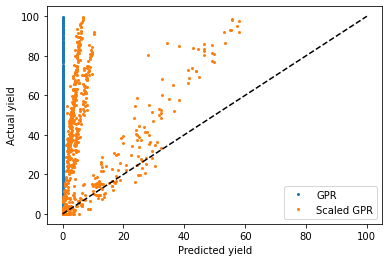

In [105]:
# Evaluate the models
# Evaluate the unscaled model
print('The best model: %s' % gp)
print("Training MSE: %.5f" % mean_squared_error(yTr, gp.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, gp.predict(xTe)))
print('Test R2: %.5f' % r2_score(yTe, gp.predict(xTe)))

# Evaluate the scaled model
print('The best model: %s' % scaledGPR[1])
print("Training MSE: %.5f" % mean_squared_error(yTr, scaledGPR.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, scaledGPR.predict(xTe)))
print('Test R2: %.5f' % r2_score(yTe, scaledGPR.predict(xTe)))

# Generate exp-actual plot
plt.plot(gpr.predict(xTe), yTe, '.', markersize=4, label='GPR')
plt.plot(scaledGPR.predict(xTe), yTe, '.', markersize=4, label='Scaled GPR')
plt.plot(np.linspace(0,100),np.linspace(0,100), 'k--')
plt.ylabel('Actual yield')
plt.xlabel('Predicted yield')
plt.legend()
plt.show()

#### Support Vector Regression

In [37]:
from sklearn.svm import SVR

svr = GridSearchCV(SVR(),
    param_grid={"C": [1e-3, 1e-1, 1e0, 1e1, 1e3]},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1).fit(xTr, yTr)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [38]:
scaledSVR= make_pipeline(StandardScaler(),
    GridSearchCV(SVR(),
    param_grid={"C": [1e-2, 1e0, 1e2], 'kernel': ['linear', 'rbf', 'sigmoid']},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1)).fit(xTr, yTr)
    

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [41]:
scaledSVR2= make_pipeline(StandardScaler(),
    GridSearchCV(SVR(C=1000),
    param_grid={"gamma": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1)).fit(xTr, yTr)
    

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [39]:
# Zuranski model
svrAMZ= make_pipeline(StandardScaler(),SVR(C=0.5, gamma=0.007)).fit(xTr, yTr)

The best model: SVR(C=1000.0)
Training MSE: 0.00995
Test MSE: 66.77660
Test R2: 0.91141
The best model: SVR(C=100.0)
Training MSE: 19.75282
Test MSE: 75.69085
Test RMSE: 8.70005
Test R2: 0.89958
The best model: SVR(C=1000, gamma=0.01)
Training MSE: 16.67205
Test MSE: 75.69853
Test RMSE: 8.70049
Test R2: 0.89957
The Zuranski model: SVR(C=0.5, gamma=0.007)
Training MSE: 418.81027
Test MSE: 419.03543
Test RMSE: 20.47035
Test R2: 0.44407


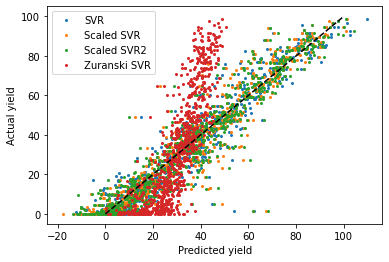

In [42]:
# Evaluate the models
# Evaluate the unscaled model
print('The best model: %s' % svr.best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, svr.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, svr.predict(xTe)))
print('Test R2: %.5f' % r2_score(yTe, svr.predict(xTe)))

# Evaluate the scaled model
print('The best model: %s' % scaledSVR[1].best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, scaledSVR.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, scaledSVR.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, scaledSVR.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, scaledSVR.predict(xTe)))

# Evaluate the scaled model
print('The best model: %s' % scaledSVR2[1].best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, scaledSVR2.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, scaledSVR2.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, scaledSVR2.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, scaledSVR2.predict(xTe)))

# Evaluate the Zuranski model
print('The Zuranski model: %s' % svrAMZ[1])
print("Training MSE: %.5f" % mean_squared_error(yTr, svrAMZ.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, svrAMZ.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, svrAMZ.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, svrAMZ.predict(xTe)))

# Generate exp-actual plot
plt.plot(svr.predict(xTe), yTe, '.', markersize=4, label='SVR')
plt.plot(scaledSVR.predict(xTe), yTe, '.', markersize=4, label='Scaled SVR')
plt.plot(scaledSVR2.predict(xTe), yTe, '.', markersize=4, label='Scaled SVR2')
plt.plot(svrAMZ.predict(xTe), yTe, '.', markersize=4, label='Zuranski SVR')
plt.plot(np.linspace(0,100),np.linspace(0,100), 'k--')
plt.ylabel('Actual yield')
plt.xlabel('Predicted yield')
plt.legend()
plt.show()

### Tree Based Methods

#### Regression Tree

In [43]:
from sklearn.tree import DecisionTreeRegressor

dtr= GridSearchCV(DecisionTreeRegressor(),
    param_grid={"min_samples_leaf": [1, 10, 100, 200, 300, 400, 500]},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1).fit(xTr, yTr)

scaledDTR= make_pipeline(StandardScaler(), 
    GridSearchCV(DecisionTreeRegressor(),
    param_grid={"min_samples_leaf": [1, 10, 100, 200, 300, 400, 500]},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1)).fit(xTr, yTr)


Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits


The best model: DecisionTreeRegressor()
Training MSE: 0.00000
Test MSE: 147.74986
Test R2: 0.80398
The best model: DecisionTreeRegressor()
Training MSE: 0.00000
Test MSE: 150.55775
Test RMSE: 12.27020
Test R2: 0.80026


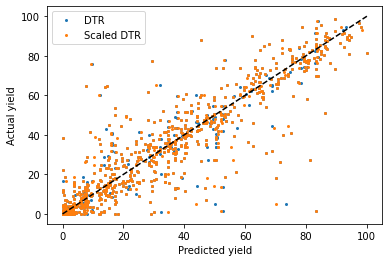

In [44]:
# Evaluate the models
# Evaluate the unscaled model
print('The best model: %s' % dtr.best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, dtr.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, dtr.predict(xTe)))
print('Test R2: %.5f' % r2_score(yTe, dtr.predict(xTe)))

# Evaluate the scaled model
print('The best model: %s' % scaledDTR[1].best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, scaledDTR.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, scaledDTR.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, scaledDTR.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, scaledDTR.predict(xTe)))

# Generate exp-actual plot
plt.plot(dtr.predict(xTe), yTe, '.', markersize=4, label='DTR')
plt.plot(scaledDTR.predict(xTe), yTe, '.', markersize=4, label='Scaled DTR')
plt.plot(np.linspace(0,100),np.linspace(0,100), 'k--')
plt.ylabel('Actual yield')
plt.xlabel('Predicted yield')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr= GridSearchCV(RandomForestRegressor(max_features='sqrt'),
    param_grid={"n_estimators": [10, 100, 300, 500]},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1).fit(xTr, yTr)


In [47]:
scaledRFR= make_pipeline(StandardScaler(), 
    GridSearchCV(RandomForestRegressor(),
    param_grid={"n_estimators": [10, 100, 200, 300]},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1)).fit(xTr, yTr)


Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [48]:
scaledRFR2= make_pipeline(StandardScaler(), 
    GridSearchCV(RandomForestRegressor(),
    param_grid={"n_estimators": [10, 20, 30, 40, 50]},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1)).fit(xTr, yTr)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [49]:
# Zuranski Model
rfrAMZ= make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=20)).fit(xTr, yTr)

The best model: RandomForestRegressor(n_estimators=300)
Training MSE: 11.29097
Test MSE: 89.69393
Test RMSE: 9.47069
Test R2: 0.88100
The best model: RandomForestRegressor(n_estimators=50)
Training MSE: 12.03802
Test MSE: 89.74909
Test RMSE: 9.47360
Test R2: 0.88093
The Zuranski model: RandomForestRegressor(n_estimators=20)
Training MSE: 13.66415
Test MSE: 90.83584
Test RMSE: 9.53078
Test R2: 0.87949


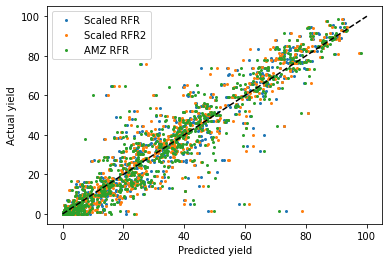

In [50]:
# Evaluate the models
# # Evaluate the unscaled model
# print('The best model: %s' % rfr.best_estimator_)
# print("Training MSE: %.5f" % mean_squared_error(yTr, rfr.predict(xTr)))
# print("Test MSE: %.5f" % mean_squared_error(yTe, rfr.predict(xTe)))
# print('Test R2: %.5f' % r2_score(yTe, rfr.predict(xTe)))

# Evaluate the scaled model
print('The best model: %s' % scaledRFR[1].best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, scaledRFR.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, scaledRFR.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, scaledRFR.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, scaledRFR.predict(xTe)))

# Evaluate the scaled model2
print('The best model: %s' % scaledRFR2[1].best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, scaledRFR2.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, scaledRFR2.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, scaledRFR2.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, scaledRFR2.predict(xTe)))

# Evaluate the Zuranski model
print('The Zuranski model: %s' % rfrAMZ[1])
print("Training MSE: %.5f" % mean_squared_error(yTr, rfrAMZ.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, rfrAMZ.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, rfrAMZ.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, rfrAMZ.predict(xTe)))

# Generate exp-actual plot
# plt.plot(rfr.predict(xTe), yTe, '.', markersize=4, label='RFR')
plt.plot(scaledRFR.predict(xTe), yTe, '.', markersize=4, label='Scaled RFR')
plt.plot(scaledRFR2.predict(xTe), yTe, '.', markersize=4, label='Scaled RFR2')
plt.plot(rfrAMZ.predict(xTe), yTe, '.', markersize=4, label='AMZ RFR')
plt.plot(np.linspace(0,100),np.linspace(0,100), 'k--')
plt.ylabel('Actual yield')
plt.xlabel('Predicted yield')
plt.legend()
plt.show()

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

gbr= GridSearchCV(GradientBoostingRegressor(n_estimators=100),
    param_grid={'learning_rate': np.logspace(-2,1, num=4)},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1).fit(xTr, yTr)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


/Users/nml64/.conda/envs/nmlenv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:978: RuntimeWarning: overflow encountered in square
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


In [58]:
print('The best model: %s' % gbr.best_estimator_)

The best model: GradientBoostingRegressor(learning_rate=1.0)


In [53]:
gbr2= GridSearchCV(GradientBoostingRegressor(learning_rate=1),
    param_grid={"n_estimators": [100, 200, 500, 700]},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1).fit(xTr, yTr)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


The best model: GradientBoostingRegressor(learning_rate=1.0)
Training MSE: 51.67763
Test MSE: 105.49200
Test RMSE: 10.27093
Test R2: 0.86005
The best model: GradientBoostingRegressor(learning_rate=1, n_estimators=500)
Training MSE: 20.15030
Test MSE: 90.11850
Test RMSE: 9.49308
Test R2: 0.88044


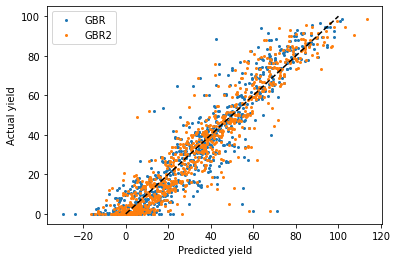

In [54]:
# Evaluate the model
print('The best model: %s' % gbr.best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, gbr.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, gbr.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, gbr.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, gbr.predict(xTe)))

# Evaluate the model
print('The best model: %s' % gbr2.best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, gbr2.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, gbr2.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, gbr2.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, gbr2.predict(xTe)))

# # Evaluate the model
# print('The best model: %s' % gbr3.best_estimator_)
# print("Training MSE: %.5f" % mean_squared_error(yTr, gbr3.predict(xTr)))
# print("Test MSE: %.5f" % mean_squared_error(yTe, gbr3.predict(xTe)))
# print("Test RMSE: %.5f" % mean_squared_error(yTe, gbr3.predict(xTe), squared=False))
# print('Test R2: %.5f' % r2_score(yTe, gbr3.predict(xTe)))

# Generate exp-actual plot
plt.plot(gbr.predict(xTe), yTe, '.', markersize=4, label='GBR')
plt.plot(gbr2.predict(xTe), yTe, '.', markersize=4, label='GBR2')
# plt.plot(gbr3.predict(xTe), yTe, '.', markersize=4, label='GBR3')
plt.plot(np.linspace(0,100),np.linspace(0,100), 'k--')
plt.ylabel('Actual yield')
plt.xlabel('Predicted yield')
plt.legend()
plt.show()

In [55]:
from sklearn.ensemble import AdaBoostRegressor

abr= GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), loss='exponential'),
    param_grid={"n_estimators": [10, 50, 100], 'learning_rate': [0.1, 1, 10]},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1).fit(xTr, yTr)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [56]:
print('The best model: %s' % abr.best_estimator_)

The best model: AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.1, loss='exponential')


In [57]:
abr2= GridSearchCV(AdaBoostRegressor(n_estimators=50, learning_rate=0.1, loss='exponential'),
    param_grid={"base_estimator": [DecisionTreeRegressor(max_depth=1), 
        DecisionTreeRegressor(max_depth=2), 
        DecisionTreeRegressor(max_depth=3),
        DecisionTreeRegressor(max_depth=4),
        DecisionTreeRegressor(max_depth=5)]},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1).fit(xTr, yTr)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


The best model: AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.1, loss='exponential')
Training MSE: 494.24702
Test MSE: 498.20297
Test RMSE: 22.32046
Test R2: 0.33904
The best model: AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                  learning_rate=0.1, loss='exponential')
Training MSE: 369.44616
Test MSE: 385.38887
Test RMSE: 19.63132
Test R2: 0.48871


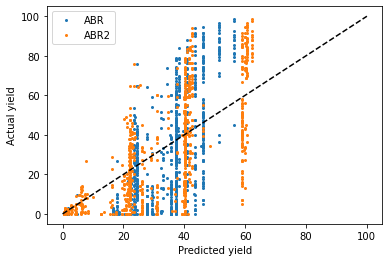

In [59]:
# Evaluate the model
print('The best model: %s' % abr.best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, abr.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, abr.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, abr.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, abr.predict(xTe)))

# Evaluate the model
print('The best model: %s' % abr2.best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, abr2.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, abr2.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, abr2.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, abr2.predict(xTe)))

# Generate exp-actual plot
plt.plot(abr.predict(xTe), yTe, '.', markersize=4, label='ABR')
plt.plot(abr2.predict(xTe), yTe, '.', markersize=4, label='ABR2')
plt.plot(np.linspace(0,100),np.linspace(0,100), 'k--')
plt.ylabel('Actual yield')
plt.xlabel('Predicted yield')
plt.legend()
plt.show()

In [61]:
import xgboost as xgb

X= xTr
y= yTr

xgr= GridSearchCV(xgb.XGBRegressor(eval_metric= mean_squared_error),
    param_grid={"n_estimators": [20, 30, 40], 'max_depth': [3,6,9]},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1).fit(X, y)


Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [62]:
# Zuranski Model
xgrAMZ= xgb.XGBRegressor(max_depth=6, n_estimators= 15, learning_rate= 0.3, gamma=0, subsample=1).fit(X, y)

The best model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eval_metric=<function mean_squared_error at 0x7f92d8712550>,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=40, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Training MSE: 16.15695
Test MSE: 76.04778
Test RMSE: 8.72054
Test R2: 0.89911
The Zuranski model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, impo

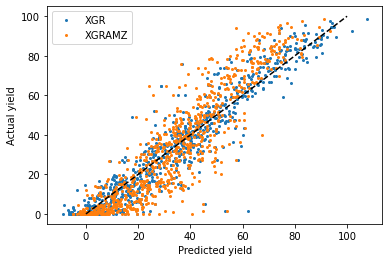

In [64]:
# Evaluate the model
print('The best model: %s' % xgr.best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(y, xgr.predict(X)))
print("Test MSE: %.5f" % mean_squared_error(yTe, xgr.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, xgr.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, xgr.predict(xTe)))

# Evaluate the model
print('The Zuranski model: %s' % xgrAMZ)
print("Training MSE: %.5f" % mean_squared_error(y, xgrAMZ.predict(X)))
print("Test MSE: %.5f" % mean_squared_error(yTe, xgrAMZ.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, xgrAMZ.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, xgrAMZ.predict(xTe)))

# Generate exp-actual plot
plt.plot(xgr.predict(xTe), yTe, '.', markersize=4, label='XGR')
plt.plot(xgrAMZ.predict(xTe), yTe, '.', markersize=4, label='XGRAMZ')
plt.plot(np.linspace(0,100),np.linspace(0,100), 'k--')
plt.ylabel('Actual yield')
plt.xlabel('Predicted yield')
plt.legend()
plt.show()

### Neural Nets

In [ ]:
from sklearn.neural_network import MLPRegressor

nnr= GridSearchCV(MLPRegressor(),
    param_grid={"hidden_layer_sizes": [(1), (5,), (10,), (100,)], "alpha": [1e-5, 1e-4, 1e-3]},
    cv= KFold(n_splits=10),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1).fit(xTr, yTr)

In [ ]:
scaledNNR= make_pipeline(StandardScaler(),
    GridSearchCV(MLPRegressor(),
    param_grid={"hidden_layer_sizes": [(3,), (4,), (5,), (6,), (8,), (10,)]},
    cv=LeaveOneGroupOut(),
    scoring= make_scorer(mean_squared_error, greater_is_better=False),
    verbose= 1)).fit(xTr, yTr, gridsearchcv__groups=xNumTr)

In [243]:
scaledNNR2= make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(6,), max_iter=1000)).fit(xTr, yTr)

nnrAMZ= make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(4,), max_iter=1000)).fit(xTr, yTr)

In [ ]:
# Evaluate the model
print('The best model: %s' % nnr.best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, nnr.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, nnr.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, nnr.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, nnr.predict(xTe)))

# Evaluate the model
print('The best model: %s' % scaledNNR[1].best_estimator_)
print("Training MSE: %.5f" % mean_squared_error(yTr, scaledNNR.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, scaledNNR.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, scaledNNR.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, scaledNNR.predict(xTe)))

# Evaluate the model
print('The best model: %s' % scaledNNR2[1])
print("Training MSE: %.5f" % mean_squared_error(yTr, scaledNNR2.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, scaledNNR2.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, scaledNNR2.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, scaledNNR2.predict(xTe)))

# Evaluate the model
print('The Zuranski model: %s' % nnrAMZ)
print("Training MSE: %.5f" % mean_squared_error(yTr, nnrAMZ.predict(xTr)))
print("Test MSE: %.5f" % mean_squared_error(yTe, nnrAMZ.predict(xTe)))
print("Test RMSE: %.5f" % mean_squared_error(yTe, nnrAMZ.predict(xTe), squared=False))
print('Test R2: %.5f' % r2_score(yTe, nnrAMZ.predict(xTe)))

# Generate exp-actual plot
plt.plot(nnr.predict(xTe), yTe, '.', markersize=4, label='NNR')
plt.plot(scaledNNR.predict(xTe), yTe, '.', markersize=4, label='Scaled NNR')
plt.plot(scaledNNR2.predict(xTe), yTe, '.', markersize=4, label='Scaled NNR2')
plt.plot(nnrAMZ.predict(xTe), yTe, '.', markersize=4, label='nnr AMZ')
plt.plot(np.linspace(0,100),np.linspace(0,100), 'k--')
plt.ylabel('Actual yield')
plt.xlabel('Predicted yield')
plt.legend()
plt.show()